<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [5]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [7]:
## Write your code here
#identify and remove the duplicate rows
duplicates = df.duplicated()  # Identify the duplicate rows
# Display the duplicate rows
print("Duplicate Rows:")
print(df[duplicates])
#remove the duplicate rows
df_cleaned = df.drop_duplicates()
# Display the DataFrame after removing duplicates
print("DataFrame after removing duplicates:")
print(df_cleaned.head())

Duplicate Rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWorkedWith, Of

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [8]:
## Write your code here
#identify missing values in CodingActivities column
missing_values = df.isnull().sum()  # Find the missing values for all columns
# Display the missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [14]:
## Write your code here
# Identify missing values in CodingActivities column
missing_coding_activities = df['CodingActivities'].isnull().sum()
print(f"Missing values in 'CodingActivities': {missing_coding_activities}")

# (For later tasks: we will use forward-fill to impute missing compensation data, then normalize it.)

Missing values in 'CodingActivities': 0


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [9]:
## Write your code here
#Impute missing values in CodingActivities column with forward-fill method
df['CodingActivities'].fillna(method='ffill', inplace=True)
# Display the DataFrame after imputation
print("DataFrame after imputing 'CodingActivities':")
print(df.head())

DataFrame after imputing 'CodingActivities':
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3  Hobby;Contribute to open-source projects;O

C:\Users\Big Honk\AppData\Local\Temp\ipykernel_21872\347297749.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CodingActivities'].fillna(method='ffill', inplace=True)
C:\Users\Big Honk\AppData\Local\Temp\ipykernel_21872\347297749.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'].fillna(method='ffill', inplace=True)


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [10]:
## Write your code here
#Identify compensation-related columns, such as ConvertedCompYearly.
#Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.
compensation_columns = [col for col in df.columns if 'Comp' in col]
if compensation_columns:
    for col in compensation_columns:
        print(f"Compensation-related column found: {col}")
else:    print("No compensation-related columns found.")
# Display the compensation-related columns
print("Compensation-related columns:")
print(compensation_columns)


Compensation-related column found: CompTotal
Compensation-related column found: AIComplex
Compensation-related column found: ConvertedCompYearly
Compensation-related columns:
['CompTotal', 'AIComplex', 'ConvertedCompYearly']


In [23]:
# Create a new DataFrame with NaNs dropped in 'CompTotal' and 'ConvertedCompYearly' columns
df_compensation = df.dropna(subset=['CompTotal', 'ConvertedCompYearly'])
# Display the DataFrame after dropping NaNs in compensation columns
print("DataFrame after dropping NaNs in compensation columns:")
print(df_compensation[['CompTotal', 'ConvertedCompYearly']].head())


DataFrame after dropping NaNs in compensation columns:
     CompTotal  ConvertedCompYearly
72   2040000.0               7322.0
374    28000.0              30074.0
379    85000.0              91295.0
385    50000.0              53703.0
389   110000.0             110000.0


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [27]:
# Normalize the 'CompTotal' and 'ConvertedCompYearly' columns
# If sklearn is not available, use manual Min-Max scaling as a fallback

if 'CompTotal' in df_compensation.columns and 'ConvertedCompYearly' in df_compensation.columns:
    # Manual Min-Max scaling
    for col in ['CompTotal', 'ConvertedCompYearly']:
        min_val = df_compensation[col].min()
        max_val = df_compensation[col].max()
        df_compensation[col + '_MinMax'] = (df_compensation[col] - min_val) / (max_val - min_val)
    # Display the first few rows to verify normalization
    print(df_compensation[['CompTotal_MinMax', 'ConvertedCompYearly_MinMax']].head())
else:
    print("Required columns not found in the DataFrame for normalization.")

     CompTotal_MinMax  ConvertedCompYearly_MinMax
72      2.040000e-144                    0.000450
374     2.800000e-146                    0.001850
379     8.500000e-146                    0.005616
385     5.000000e-146                    0.003303
389     1.100000e-145                    0.006766


C:\Users\Big Honk\AppData\Local\Temp\ipykernel_21872\805416622.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compensation[col + '_MinMax'] = (df_compensation[col] - min_val) / (max_val - min_val)


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [28]:
## Write your code here
#Apply Z-score Normalization to `ConvertedCompYearly`.
#Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.
if 'ConvertedCompYearly' in df.columns:
    # Replace NaN values with the mean of the column
    df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean(), inplace=True)
    mean_value = df['ConvertedCompYearly'].mean()
    std_dev = df['ConvertedCompYearly'].std()
    df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_value) / std_dev
    # Display the DataFrame after Z-score normalization
    print("DataFrame after Z-score normalization of 'ConvertedCompYearly':")
    print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())
else:
    print("ConvertedCompYearly column not found in the DataFrame.")

DataFrame after Z-score normalization of 'ConvertedCompYearly':
   ConvertedCompYearly  ConvertedCompYearly_Zscore
0         86155.287263                1.302052e-16
1         86155.287263                1.302052e-16
2         86155.287263                1.302052e-16
3         86155.287263                1.302052e-16
4         86155.287263                1.302052e-16


C:\Users\Big Honk\AppData\Local\Temp\ipykernel_21872\1404950796.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean(), inplace=True)


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


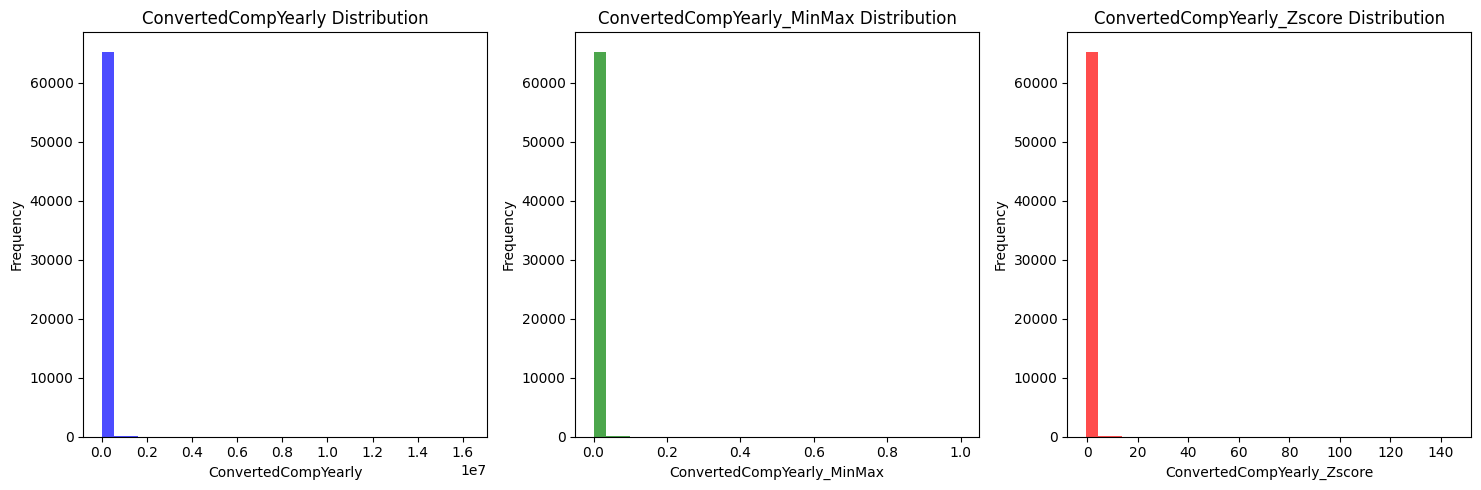

In [29]:
## Write your code here
#Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`
#Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.
if 'ConvertedCompYearly' in df.columns:
    plt.figure(figsize=(15, 5))

    # Histogram for ConvertedCompYearly
    plt.subplot(1, 3, 1)
    plt.hist(df['ConvertedCompYearly'].dropna(), bins=30, color='blue', alpha=0.7)
    plt.title('ConvertedCompYearly Distribution')
    plt.xlabel('ConvertedCompYearly')
    plt.ylabel('Frequency')

    # Histogram for ConvertedCompYearly_MinMax
    plt.subplot(1, 3, 2)
    plt.hist(df['ConvertedCompYearly_MinMax'].dropna(), bins=30, color='green', alpha=0.7)
    plt.title('ConvertedCompYearly_MinMax Distribution')
    plt.xlabel('ConvertedCompYearly_MinMax')
    plt.ylabel('Frequency')

    # Histogram for ConvertedCompYearly_Zscore
    plt.subplot(1, 3, 3)
    plt.hist(df['ConvertedCompYearly_Zscore'].dropna(), bins=30, color='red', alpha=0.7)
    plt.title('ConvertedCompYearly_Zscore Distribution')
    plt.xlabel('ConvertedCompYearly_Zscore')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [ ]:
conver

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
